In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
cwd = os.getcwd()
print(cwd)

/Users/fmichaud/PycharmProjects/medeas_simulations/three_population


In [2]:
simulation_subfolder = "three_population"
current_folder = os.getcwd()
home_folder = os.path.split(current_folder)[0]
simulation_subfolder = os.path.join(home_folder,simulation_subfolder)
Ls = [int(10**(i/4)) for i in range(8,25)] #regulary space with 4 point between each order of magnitude
D1 = 0.01
D2 = 0.1
all_distances1= [[0,0]]
sigma1 = [[0,0,0]]
all_distances2= [[0,0]]
sigma2 = [[0,0,0]]
for L in Ls:
    distance_summary_file = f'convergence_various_L/L_{L}.dat'
    distance_summary_file = os.path.join(simulation_subfolder,distance_summary_file)
    distances  = np.loadtxt(distance_summary_file)
    for distance in distances:
        all_distances1 = np.append(all_distances1,[[L,distance[0]]],axis = 0)
        all_distances2 = np.append(all_distances2,[[L,distance[1]]],axis = 0)
    sigma_within1 = np.std(distances[1:,0],ddof=1)
    sigma_outside1 = np.sqrt(np.sum((distances[1:,0]-2*D2)**2)/len(distances[1:,0]))
    sigma1 = np.append(sigma1,[[L,sigma_within1, sigma_outside1]],axis = 0)
    sigma_within2 = np.std(distances[1:,1],ddof=1)
    sigma_outside2 = np.sqrt(np.sum((distances[1:,1]-2*D1)**2)/len(distances[1:,1]))
    sigma2 = np.append(sigma2,[[L,sigma_within2, sigma_outside2]],axis = 0)
        
    

/Users/fmichaud/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: loadtxt: Empty input file: "/Users/fmichaud/PycharmProjects/medeas_simulations/three_population/convergence_various_L/L_1000.dat"
  from ipykernel import kernelapp as app


IndexError: too many indices for array

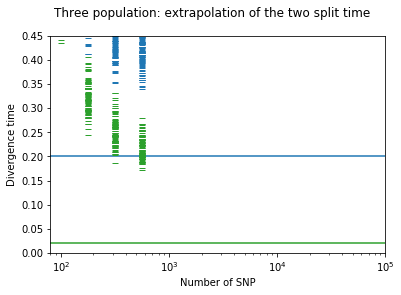

In [3]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.suptitle("Three population: extrapolation of the two split time")
plt.xlabel("Number of SNP")
plt.ylabel("Divergence time")
plt.axhline(y=0.2,c=colors[0])
plt.semilogx(all_distances1[1:,0],all_distances1[1:,1],"_")
plt.xlim((80,100000))
plt.ylim((0,0.45))
plt.axhline(y=0.02,c=colors[2])
plt.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_",c=colors[2])
plt.savefig("splitting_time_three_pop.pdf")

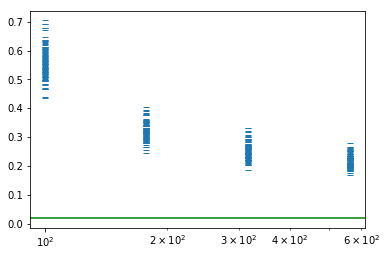

In [4]:
plt.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_")
plt.axhline(y=0.02,c="g")
plt.show()

In [5]:
all_distances1[1:]

array([[1.00000000e+02, 7.32863376e-01],
       [1.00000000e+02, 8.85868079e-01],
       [1.00000000e+02, 7.25539950e-01],
       [1.00000000e+02, 7.03472277e-01],
       [1.00000000e+02, 1.08769342e+00],
       [1.00000000e+02, 8.16894099e-01],
       [1.00000000e+02, 9.19845406e-01],
       [1.00000000e+02, 8.00282000e-01],
       [1.00000000e+02, 6.14585178e-01],
       [1.00000000e+02, 9.19626446e-01],
       [1.00000000e+02, 6.78801436e-01],
       [1.00000000e+02, 1.13379630e+00],
       [1.00000000e+02, 8.82567743e-01],
       [1.00000000e+02, 8.24806931e-01],
       [1.00000000e+02, 8.26448644e-01],
       [1.00000000e+02, 8.87501050e-01],
       [1.00000000e+02, 6.28215505e-01],
       [1.00000000e+02, 9.07095574e-01],
       [1.00000000e+02, 7.63229228e-01],
       [1.00000000e+02, 8.80080386e-01],
       [1.00000000e+02, 7.00079574e-01],
       [1.00000000e+02, 7.54577792e-01],
       [1.00000000e+02, 7.77380149e-01],
       [1.00000000e+02, 6.56579495e-01],
       [1.000000

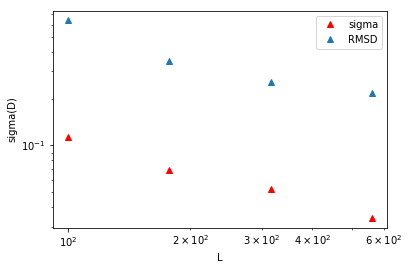

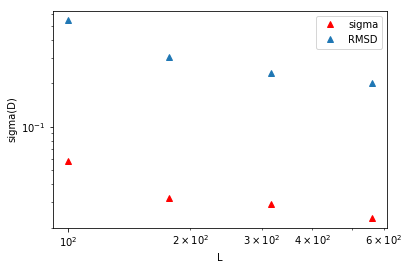

In [6]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma1[1:,0],sigma1[1:,1],"r^",label="sigma")
ax.loglog(sigma1[1:,0],sigma1[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=0.1.pdf")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma2[1:,0],sigma2[1:,1],"r^",label="sigma")
ax.loglog(sigma2[1:,0],sigma2[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=0.1.pdf")

/Users/fmichaud/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/fmichaud/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


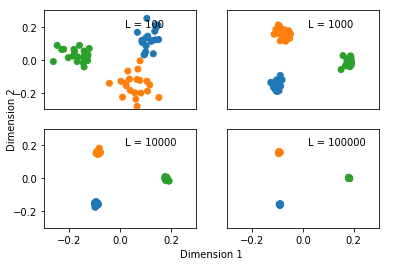

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
colors_three_pop = np.concatenate((np.full(20,colors[0]),np.full(20,colors[1]),np.full(20,colors[2])))
for iL, L in enumerate([100,1000,10000,100000]):
    location_vector = os.path.join (simulation_subfolder, f'convergence_various_L/L_{L}/MDS_eigensystem/p2.vecs.data')
    val,vec = pickle.load(open(location_vector,"rb"))
    ax = fig.add_subplot(2,2,iL+1)
    ax.set_xlim([-0.3,0.3])
    if iL in [0,1]:
        ax.set_xticks([])
    if iL in [1,3]:
        ax.set_yticks([])
    ax.set_ylim([-0.3,0.3])
    ax.text(0.02,0.2,f'L = {L}')
    order = np.argsort(-val)
    dir_x = 1
    if iL == 0:
        dir_x = -1
    dir_y = 1
    if iL in [2,3]:
        dir_y = -1
    ax.scatter(dir_x*vec[:,order[0]],dir_y*vec[:,order[1]],c = colors_three_pop)
fig.show()
fig.savefig(os.path.join(simulation_subfolder,"PCA.pdf"))


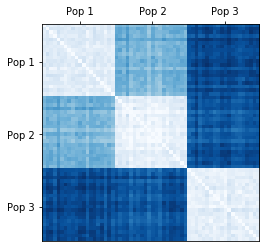

In [10]:
L = 10000
location_vector = os.path.join (simulation_subfolder, f'convergence_various_L/L_{L}/asd_matrices/p1.asd.data')
delta = pickle.load(open(location_vector,"rb"))
#np.fill_diagonal(delta,np.mean(delta,axis=1))
plt.imshow(delta, cmap='Blues',vmin=0.12)


start_position = (10,30,50)
label_pop = ("Pop 1", "Pop 2", "Pop 3")
plt.tick_params(bottom = False,top=True,labeltop=True,labelbottom = False)
plt.xticks(start_position,np.sort(label_pop))
plt.yticks(start_position,np.sort(label_pop))
plt.savefig(os.path.join(simulation_subfolder,"distance_matrix.pdf"))

In [65]:
delta

array([[0.    , 0.1331, 0.1275, ..., 0.1817, 0.1772, 0.1822],
       [0.1331, 0.    , 0.1278, ..., 0.18  , 0.1745, 0.1775],
       [0.1275, 0.1278, 0.    , ..., 0.183 , 0.1767, 0.1827],
       ...,
       [0.1817, 0.18  , 0.183 , ..., 0.    , 0.1265, 0.1267],
       [0.1772, 0.1745, 0.1767, ..., 0.1265, 0.    , 0.1312],
       [0.1822, 0.1775, 0.1827, ..., 0.1267, 0.1312, 0.    ]])